## Experiments and Results

In [1]:
import json
import os
import matplotlib.pyplot as plt

### Coin-Heaven Scenario

In [2]:
# extract total 'coins' and 'invalid' moves from "by_agent"
def extract_coins_and_invalid_from_agent(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        
        # Access the 'by_agent' section
        agent_data = data.get("by_agent", {})
        
        # We assume there's a key for the agent (like "peaceful_agent")
        if agent_data:
            # Extract the first (and possibly only) agent's data
            agent_info = next(iter(agent_data.values()))
            
            # Extract 'coins', and handle 'invalid' if it exists
            total_coins = agent_info.get("coins", 0)
            total_invalid_moves = agent_info.get("invalid", 0) 
            
            return total_coins, total_invalid_moves
        return 0, 0  # Return defaults if no agent data is found

In [3]:
# Function to process multiple json files
def process_json_files(directory_path):
    all_data = {}

    # Iterate over each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)
            total_coins, total_invalid_moves = extract_coins_and_invalid_from_agent(file_path)
            
            # Store the total coins and invalid moves for each file
            all_data[filename] = {
                "total_coins": total_coins,
                "total_invalid_moves": total_invalid_moves
            }
    
    return all_data

In [4]:
directory_path = './results/coin-heaven'
total_rounds = 500
extracted_data = process_json_files(directory_path)
agents = ['meister_eckhart', ' random_agent', 'peaceful_agent', 'coin_collector_agent', 'rule_based_agent']
average_coins = []
average_invalid_moves = []

# Print or store the results
for file, data in extracted_data.items():
    print(f"File: {file}")
    print(f"  Average Number of Collected Coins: {data['total_coins'] / total_rounds}")
    average_coins.append(data['total_coins'] / total_rounds)
    if data["total_invalid_moves"] is not None:
        print(f"  Average Number of Invalid Moves: {data['total_invalid_moves'] / total_rounds}")
        average_invalid_moves.append(data['total_invalid_moves'] / total_rounds)
    else:
        print(f"  Total Invalid Moves: Not available")


File: meister_eckhart_coin_heaven_500_with_exploration.json
  Average Number of Collected Coins: 36.686
  Average Number of Invalid Moves: 9.474
File: random_agent_coin_heaven_500.json
  Average Number of Collected Coins: 1.792
  Average Number of Invalid Moves: 9.044
File: peaceful_agent_coin_heaven_500.json
  Average Number of Collected Coins: 18.576
  Average Number of Invalid Moves: 149.12
File: coin_collector_agent_coin_heaven_500.json
  Average Number of Collected Coins: 50.0
  Average Number of Invalid Moves: 0.0
File: rule_based_agent_coin_heaven_500.json
  Average Number of Collected Coins: 50.0
  Average Number of Invalid Moves: 0.0


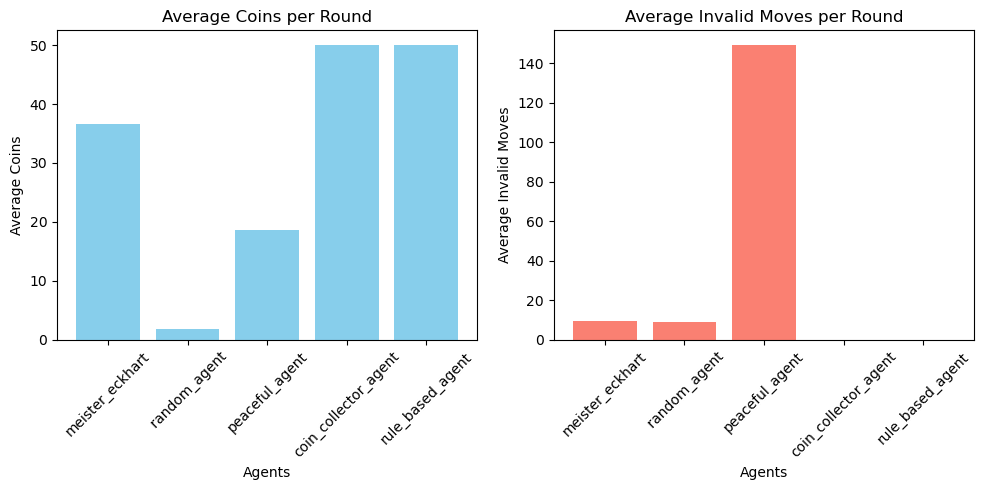

In [5]:
# Create a bar plot for average coins
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # First subplot for average coins
plt.bar(agents, average_coins, color='skyblue')
plt.title('Average Coins per Round')
plt.xlabel('Agents')
plt.ylabel('Average Coins')
plt.xticks(rotation=45)

# Create a bar plot for average invalid moves
plt.subplot(1, 2, 2)  # Second subplot for average invalid moves
plt.bar(agents, average_invalid_moves, color='salmon')
plt.title('Average Invalid Moves per Round')
plt.xlabel('Agents')
plt.ylabel('Average Invalid Moves')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

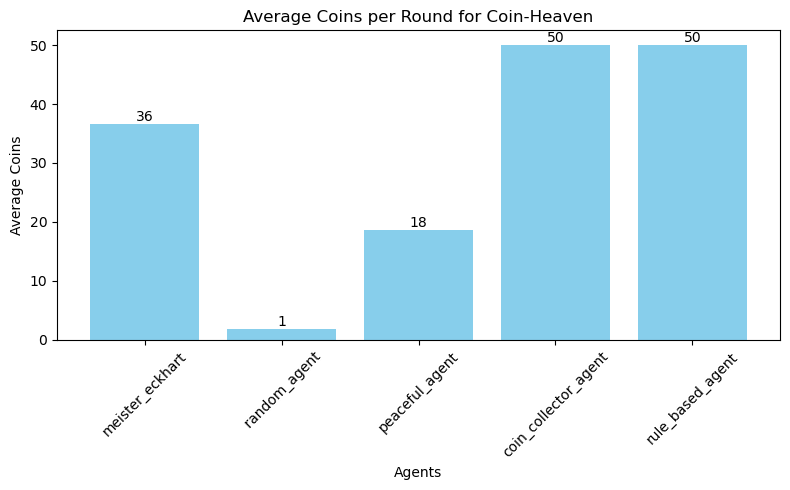

In [6]:
# Average Coins per Round
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_coins, color='skyblue')
plt.title('Average Coins per Round for Coin-Heaven')
plt.xlabel('Agents')
plt.ylabel('Average Coins')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/coin-heaven/average_coins_per_round_coin_heaven.png', dpi=300)  # Save the figure with high resolution
plt.show()

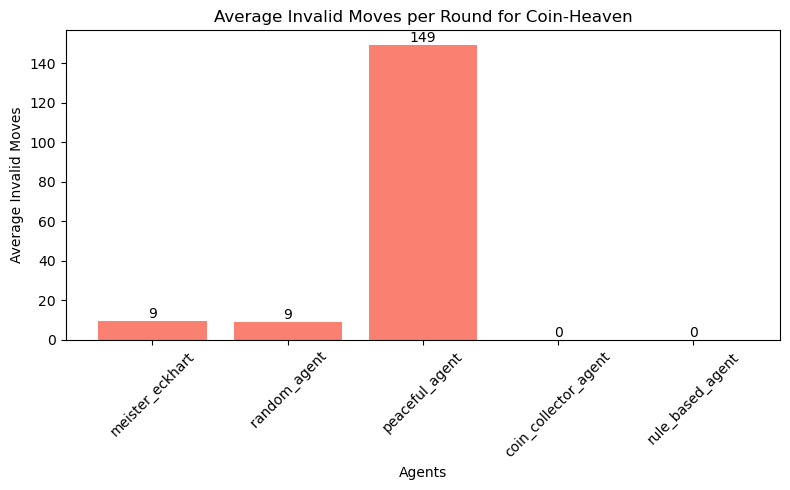

In [8]:
#Average Invalid Moves per Round
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_invalid_moves, color='salmon')
plt.title('Average Invalid Moves per Round for Coin-Heaven')
plt.xlabel('Agents')
plt.ylabel('Average Invalid Moves')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/coin-heaven/average_invalid_moves_per_round_coin_heaven.png', dpi=300)  # Save the figure with high resolution
plt.show()

### Loot-Crate Scenario

In [4]:
def extract_agent_data(file_path):
    """
    Extracts 'coins', 'invalid', 'crates', 'score', and 'steps' from a given JSON file.

    Parameters:
        file_path (str): The path to the JSON file.

    Returns:
        dict: A dictionary containing the extracted values, or None if the file is invalid.
    """
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            agent_data = data.get("by_agent", {})
            agent_info = next(iter(agent_data.values()))
            
            # Extract required fields
            coins = agent_info.get("coins", 0)
            invalid = agent_info.get("invalid", 0)
            crates = agent_info.get("crates", 0)
            score = agent_info.get("score", 0)
            steps = agent_info.get("steps", 0)

            return {
                "coins": coins,
                "invalid": invalid,
                "crates": crates,
                "score": score,
                "steps": steps
            }
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
        return None


In [5]:
def process_json_files_loot_crate(directory_path):
    all_data = {}

    # Iterate over each file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)
            data = extract_agent_data(file_path)
            
            all_data[filename] = data
    return all_data

In [6]:
directory_path = './results/loot-crate'
total_rounds = 500
extracted_data = process_json_files_loot_crate(directory_path)
average_coins = []
average_invalid_moves = []
average_score = []
average_destroyed_crates = []
average_steps_alive = []

# Print or store the results
for file, data in extracted_data.items():
    print(f"File: {file}")
    print(f"  Average Number of Collected Coins: {data['coins'] / total_rounds}")
    average_coins.append(data['coins'] / total_rounds)
    if data["invalid"] is not None:
        print(f"  Average Number of Invalid Moves: {data['invalid'] / total_rounds}")
        average_invalid_moves.append(data['invalid'] / total_rounds)
    else:
        print(f"  Total Invalid Moves: Not available")
    average_score.append(data['score'] / total_rounds)
    print(f"  Average Score: {data['score'] / total_rounds}")
    average_destroyed_crates.append(data['crates'] / total_rounds)
    print(f"  Average Destroyed Crates: {data['crates'] / total_rounds}")
    average_steps_alive.append(data['steps'] / total_rounds)
    print(f"  Average Steps Alive: {data['steps'] / total_rounds}")
    print()


File: peaceful_agent_loot_crate_500.json
  Average Number of Collected Coins: 0.0
  Average Number of Invalid Moves: 255.586
  Average Score: 0.0
  Average Destroyed Crates: 0.0
  Average Steps Alive: 400.0

File: random_agent_loot_crate_500.json
  Average Number of Collected Coins: 0.01
  Average Number of Invalid Moves: 11.172
  Average Score: 0.01
  Average Destroyed Crates: 2.91
  Average Steps Alive: 18.148

File: rule_based_agent_loot_crate_500.json
  Average Number of Collected Coins: 43.234
  Average Number of Invalid Moves: 2.046
  Average Score: 43.234
  Average Destroyed Crates: 107.606
  Average Steps Alive: 400.0

File: meister_eckhart_loot_crate_500.json
  Average Number of Collected Coins: 0.0
  Average Number of Invalid Moves: 5.098
  Average Score: 0.0
  Average Destroyed Crates: 2.76
  Average Steps Alive: 100.576

File: coin_collector_agent_loot_crate_500.json
  Average Number of Collected Coins: 43.308
  Average Number of Invalid Moves: 1.952
  Average Score: 43.308

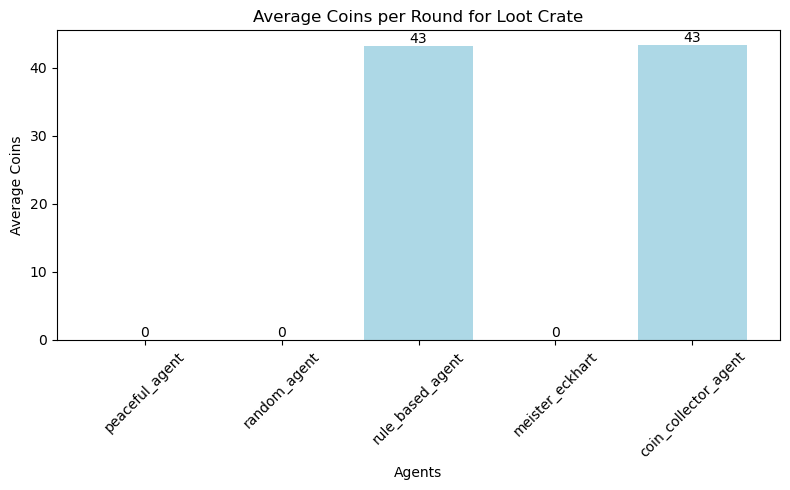

In [7]:
# Average Coins per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_coins, color='lightblue')
plt.title('Average Coins per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Coins')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_coins_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()

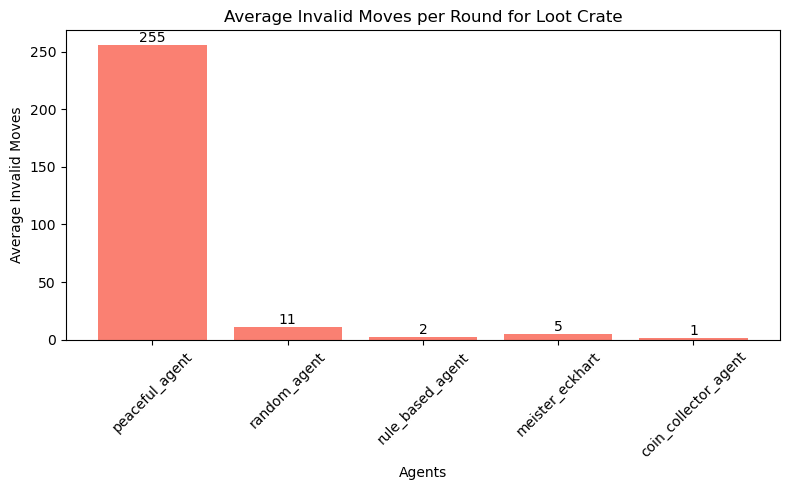

In [8]:
#Average Invalid Moves per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_invalid_moves, color='salmon')
plt.title('Average Invalid Moves per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Invalid Moves')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_invalid_moves_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()

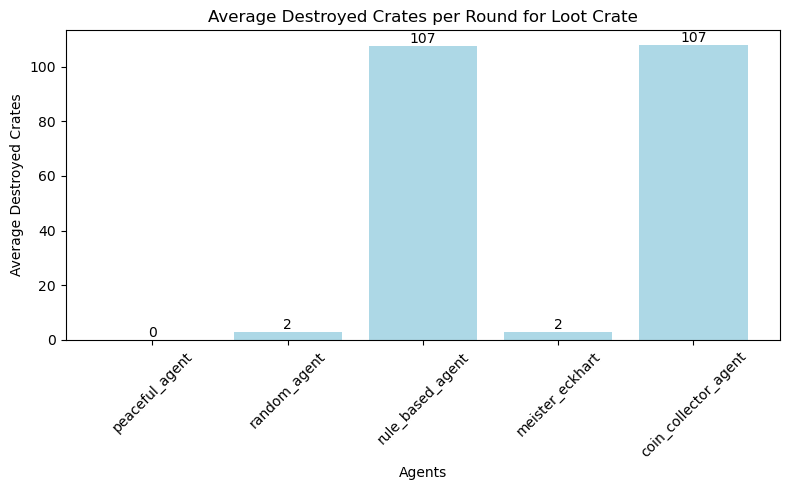

In [9]:
#Average Destroyed Crates per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_destroyed_crates, color='lightblue')
plt.title('Average Destroyed Crates per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Destroyed Crates')
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_destroyed_crates_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()

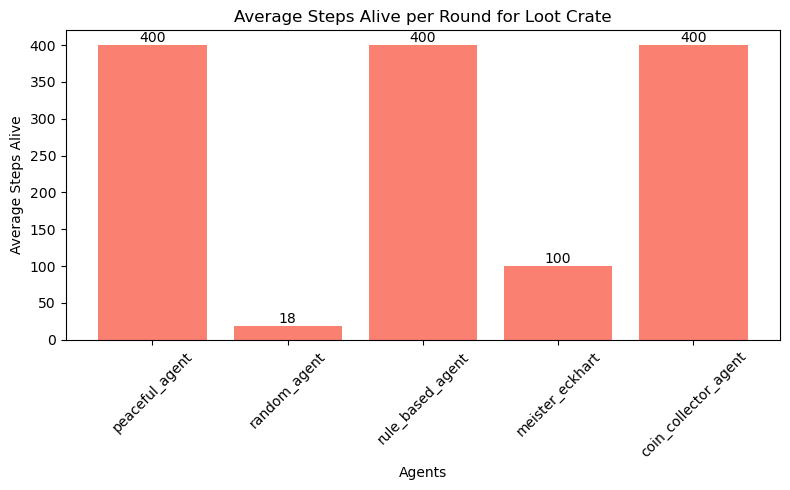

In [10]:
#Average Steps Alive per Round
agents = ['peaceful_agent', 'random_agent', 'rule_based_agent', 'meister_eckhart', 'coin_collector_agent']
plt.figure(figsize=(8, 5))
bars = plt.bar(agents, average_steps_alive, color='salmon')
plt.title('Average Steps Alive per Round for Loot Crate')
plt.xlabel('Agents')
plt.ylabel('Average Steps Alive')
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig('plots/loot-crate/average_steps_alive_per_round_loot_crate.png', dpi=300)  # Save the figure with high resolution
plt.show()

### Classic with Peaceful Agents

In [3]:
def extract_agent_data(file_path):
    # Load the JSON file
    with open(file_path, 'r') as f:
        data = json.load(f)

    # List of agents of interest
    target_agents = ["rule_based_agent", "meister_eckhart", "random_agent", "coin_collector_agent"]
    
    # Get agent data
    by_agent = data.get("by_agent", {})

    # Determine which agent's data to extract
    if all(agent.startswith("peaceful_agent") for agent in by_agent.keys()):
        agent_to_extract = "peaceful_agent_0"
    else:
        agent_to_extract = None
        for agent in target_agents:
            if agent in by_agent:
                agent_to_extract = agent
                break

    # If no valid agent is found, skip extraction
    if not agent_to_extract:
        print(f"No relevant agent found in {file_path}")
        return {}

    # Fields to extract, defaulting to 0 if not present
    fields_to_extract = ['coins', 'crates', 'invalid', 'kills', 'score', 'suicides', 'steps']
    agent_data = by_agent.get(agent_to_extract, {})
    
    # Extract the data, ensuring all fields are included with a default value of 0
    extracted_data = {field: agent_data.get(field, 0) for field in fields_to_extract}

    return {agent_to_extract: extracted_data}

# directory containing the .json files
json_directory = "./results/classic-peaceful-agents"
all_agents_data = []
# Process each .json file in the directory
for filename in os.listdir(json_directory):
    if filename.endswith(".json"):
        file_path = os.path.join(json_directory, filename)
        agent_data = extract_agent_data(file_path)
        all_agents_data.append(agent_data)
        if agent_data:
            print(f"Data from {filename}: {agent_data}")


Data from rule_based_agent_classic_peaceful.json: {'rule_based_agent': {'coins': 3880, 'crates': 54763, 'invalid': 1274, 'kills': 1382, 'score': 10790, 'suicides': 64, 'steps': 189621}}
Data from meister_eckhart_classic_peaceful.json: {'meister_eckhart': {'coins': 0, 'crates': 1389, 'invalid': 2533, 'kills': 0, 'score': 0, 'suicides': 494, 'steps': 51418}}
Data from peaceful_agent_classic.json: {'peaceful_agent_0': {'coins': 0, 'crates': 0, 'invalid': 127783, 'kills': 0, 'score': 0, 'suicides': 0, 'steps': 200000}}
Data from random_agent_classic_peaceful.json: {'random_agent': {'coins': 1, 'crates': 1471, 'invalid': 5451, 'kills': 0, 'score': 1, 'suicides': 500, 'steps': 8822}}
Data from coin_collector_agent_classic_peaceful.json: {'coin_collector_agent': {'coins': 3983, 'crates': 56423, 'invalid': 1198, 'kills': 992, 'score': 8943, 'suicides': 65, 'steps': 191709}}


In [4]:
all_agents_data

[{'rule_based_agent': {'coins': 3880,
   'crates': 54763,
   'invalid': 1274,
   'kills': 1382,
   'score': 10790,
   'suicides': 64,
   'steps': 189621}},
 {'meister_eckhart': {'coins': 0,
   'crates': 1389,
   'invalid': 2533,
   'kills': 0,
   'score': 0,
   'suicides': 494,
   'steps': 51418}},
 {'peaceful_agent_0': {'coins': 0,
   'crates': 0,
   'invalid': 127783,
   'kills': 0,
   'score': 0,
   'suicides': 0,
   'steps': 200000}},
 {'random_agent': {'coins': 1,
   'crates': 1471,
   'invalid': 5451,
   'kills': 0,
   'score': 1,
   'suicides': 500,
   'steps': 8822}},
 {'coin_collector_agent': {'coins': 3983,
   'crates': 56423,
   'invalid': 1198,
   'kills': 992,
   'score': 8943,
   'suicides': 65,
   'steps': 191709}}]

In [11]:
import matplotlib.cm as cm

def create_barplots(agents_data, num_games=500):
    # Fields to create barplots for
    fields = ['coins', 'suicides', 'crates', 'kills', 'invalid',  'steps', 'score']

    # List of agent names and their corresponding data
    agent_names = list(agents_data.keys())

    # List of colors for different bar plots
    colors = ['lightblue', 'salmon']

    # Loop over each field and create a barplot with a different color
    for i, field in enumerate(fields):
        # Get the average values for the current field from each agent (values divided by number of games)
        field_values = [agents_data[agent].get(field, 0) / num_games for agent in agent_names]

        # Create a barplot
        plt.figure(figsize=(10, 6))
        bars = plt.bar(agent_names, field_values, color=colors[i % 2])
        plt.title(f'Average {field.capitalize()} per Round for Classic Scenario against Peaceful Agents')
        plt.xlabel('Agent')
        plt.ylabel(f'Average {field.capitalize()}')
        plt.xticks(rotation=45, ha="right")  # Rotate agent names if necessary
        for bar in bars:
            yval = bar.get_height()  # Get the height of the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
        plt.tight_layout()

        # Save the plot as an image or display it
        plt.savefig(f'plots/classic/avg_{field}_barplot.png')  # Optional: save plot as a file
        plt.show()  # Display the plot

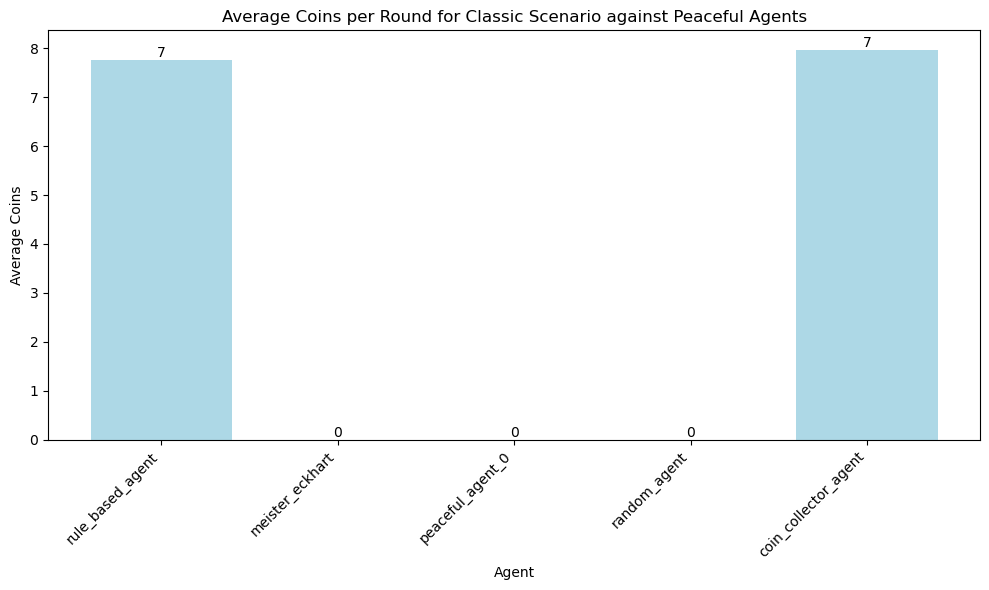

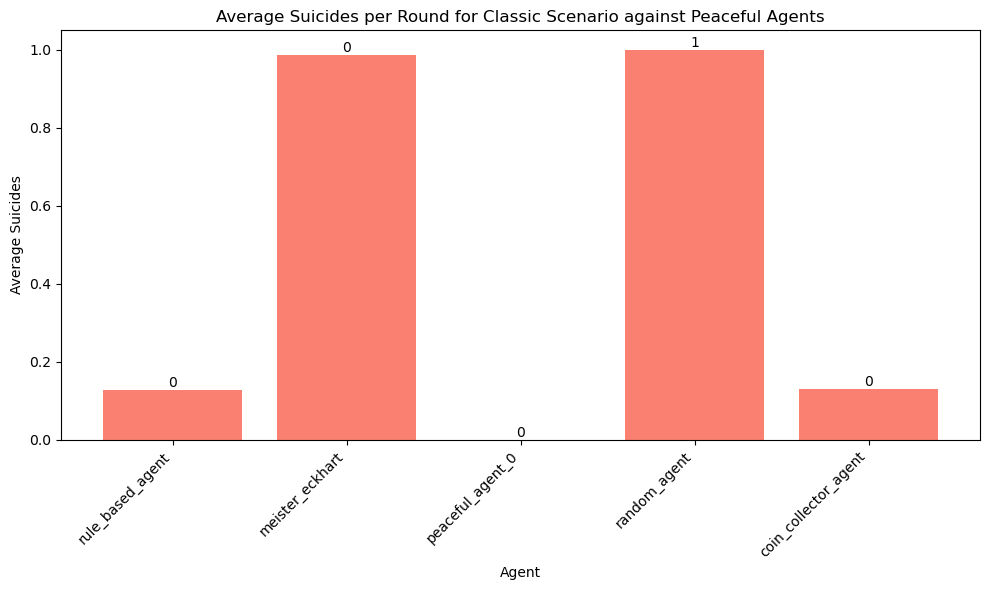

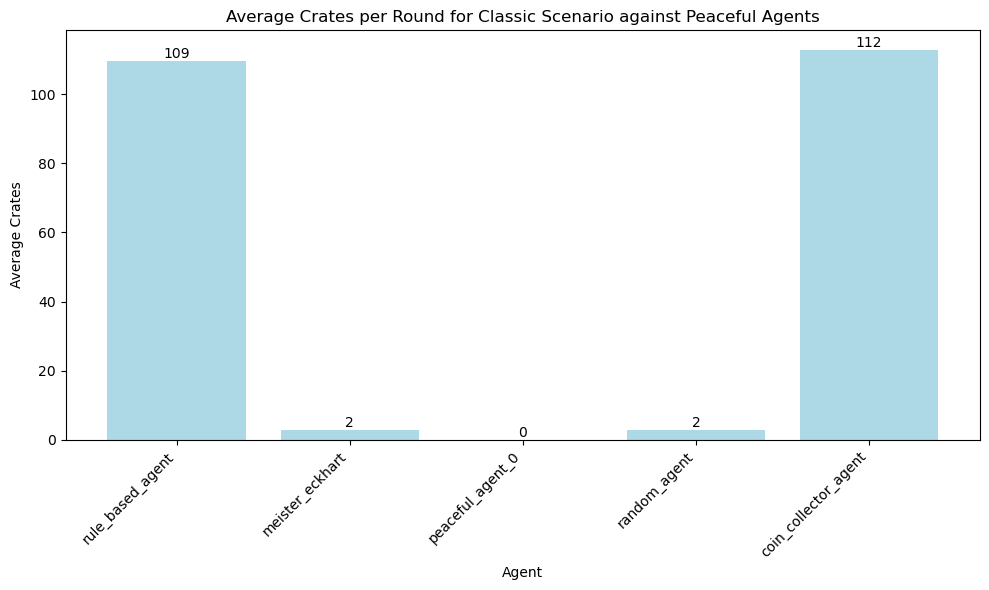

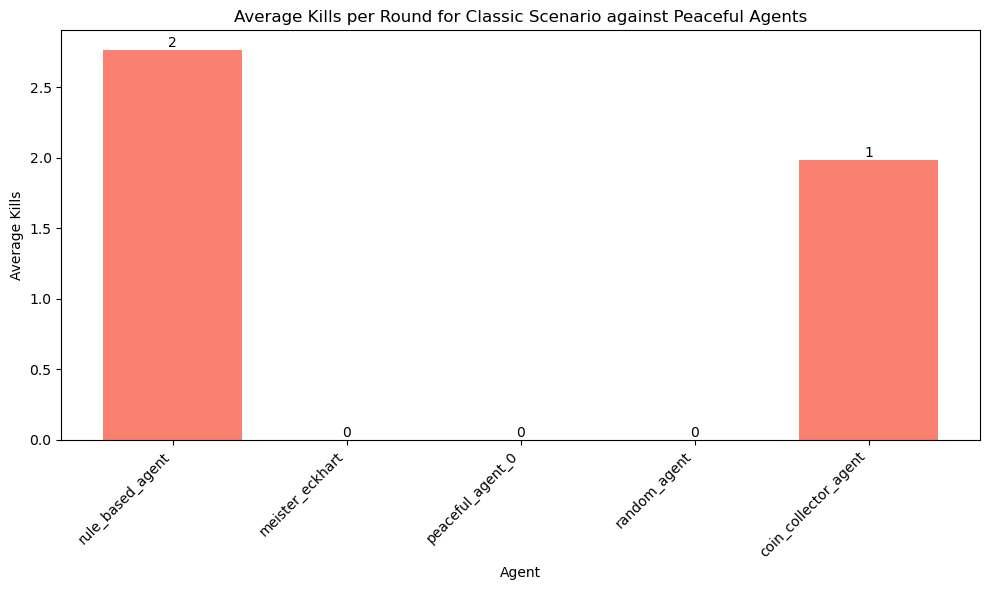

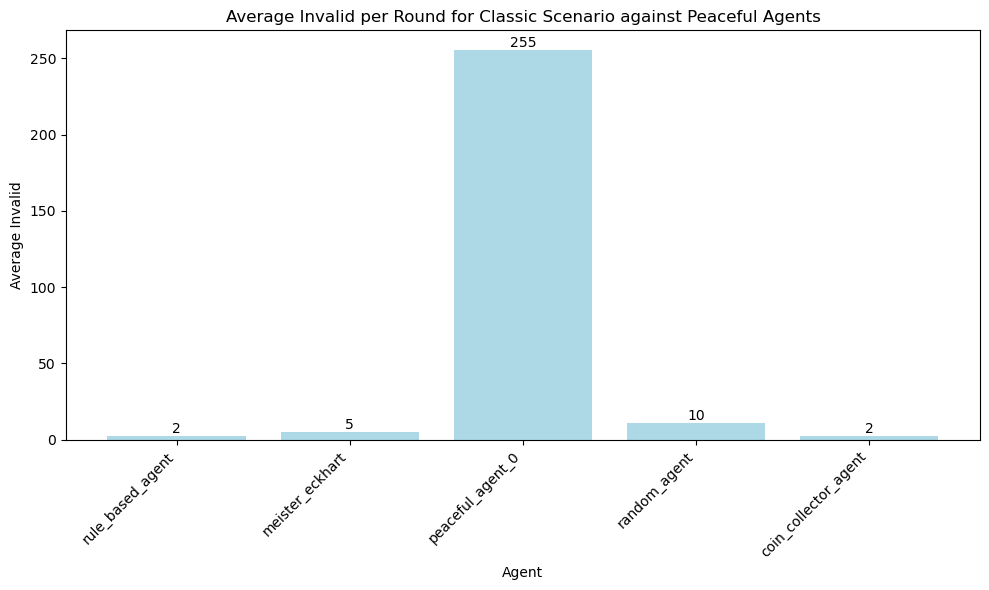

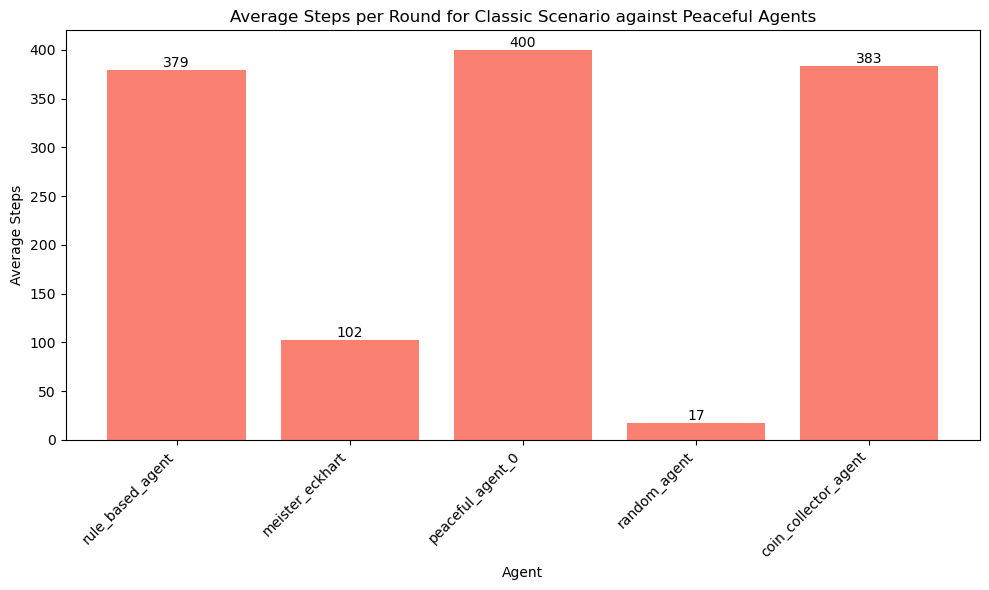

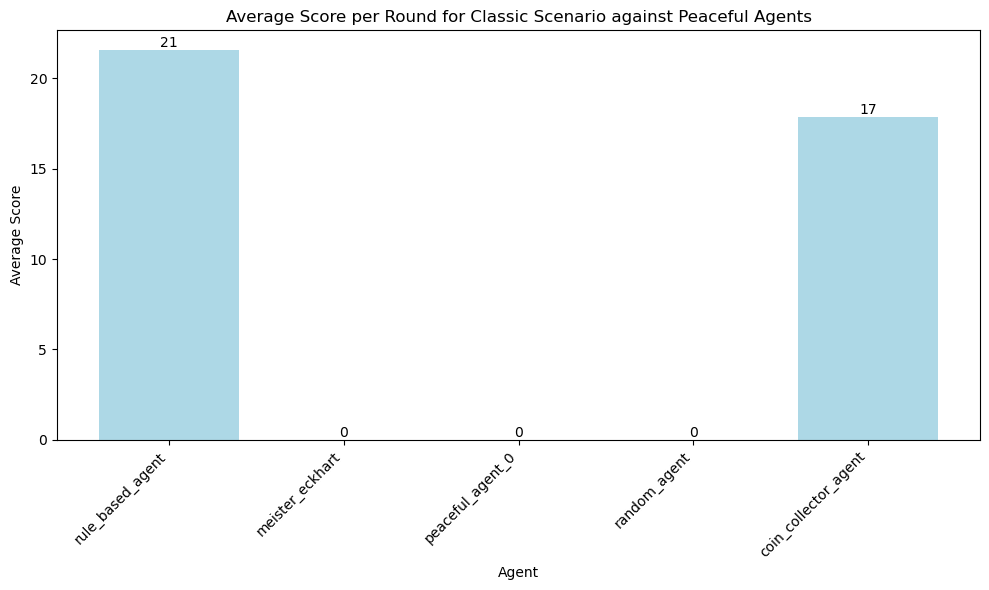

In [12]:
# Convert the list of dictionaries to a single dictionary with agent names as keys
agents_data = {list(agent_data.keys())[0]: list(agent_data.values())[0] for agent_data in all_agents_data}

# Create the bar plots with averages
create_barplots(agents_data, num_games=500)

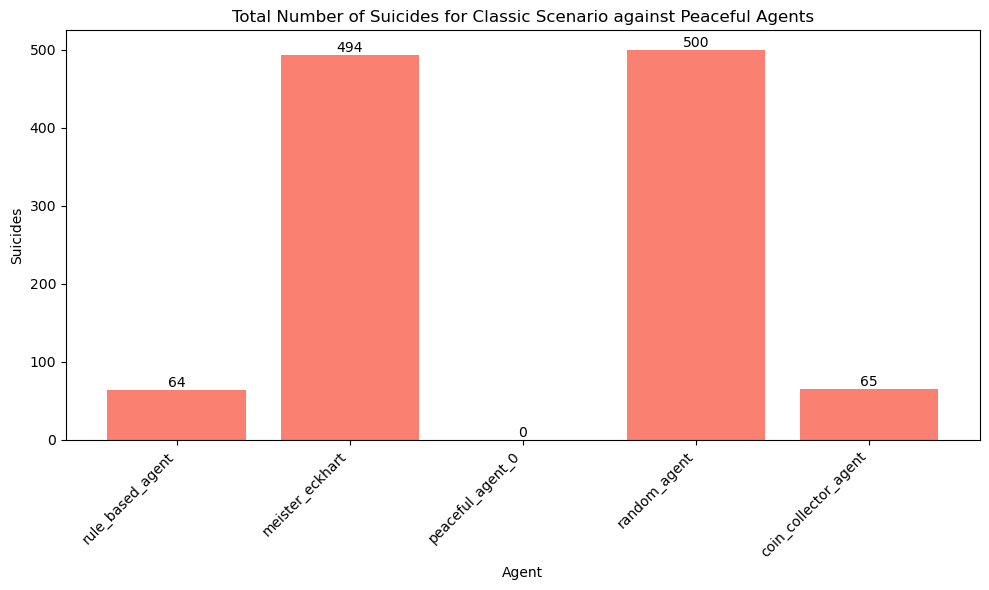

In [10]:
# List of agent names and their corresponding data
agent_names = list(agents_data.keys())

# Get the average values for the current field from each agent (values divided by number of games)
field_values = [agents_data[agent].get("suicides", 0) for agent in agent_names]

# Create a barplot
plt.figure(figsize=(10, 6))
bars = plt.bar(agent_names, field_values, color='salmon')
plt.title(f'Total Number of Suicides for Classic Scenario against Peaceful Agents')
plt.xlabel('Agent')
plt.ylabel(f'Suicides')
plt.xticks(rotation=45, ha="right")  # Rotate agent names if necessary
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()

# Save the plot as an image or display it
plt.savefig(f'plots/classic/suicides_barplot.png')  # Optional: save plot as a file
plt.show()  # Display the plot